We talked the basics of SVM in the [previous blog](http://qingkaikong.blogspot.com/2016/12/machine-learning-7-support-vector.html), and now let's use a example to show you how to use it easily with [sklearn](http://scikit-learn.org/stable/).   



In [67]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [IRIS](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) from sklearn. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

In [32]:
# import the iris data
iris = datasets.load_iris()

# let's just use the first two features, so that we can 
# easily visualize them
X = iris.data[:, :2]
y = iris.target
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


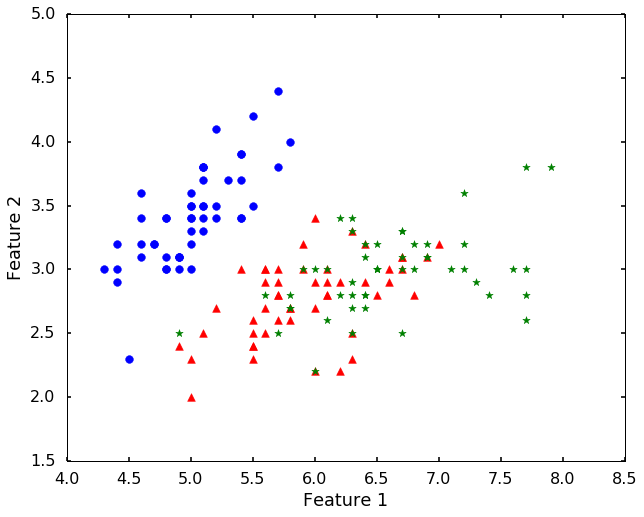

In [53]:
# let's have a look of the data first
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), ['b', 'r', 'g'], ['o', '^', '*'])):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Train an SVM classifier  

We will split the whole data into 80% training data and 20% test data. We then will build an SVM model using the default parameter setting, and train it using the training data. 

In [56]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 120, number of samples in test set: 30


The next step is doing [pre-processing](http://scikit-learn.org/stable/modules/preprocessing.html) of the data. In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. Usually, the pre-processing can transform the data to the range of 0 to 1, or zero mean and unit variance, and so on. Here, we will use the StandardScaler in sklearn to scale the data to zero mean and unit variance. 

In [60]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Initialize ANN classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with the traning data
clf.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Test ANN classifier and evaluate  

After we trained the ANN classifier, we will test the performance of the classifier using the test data. To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

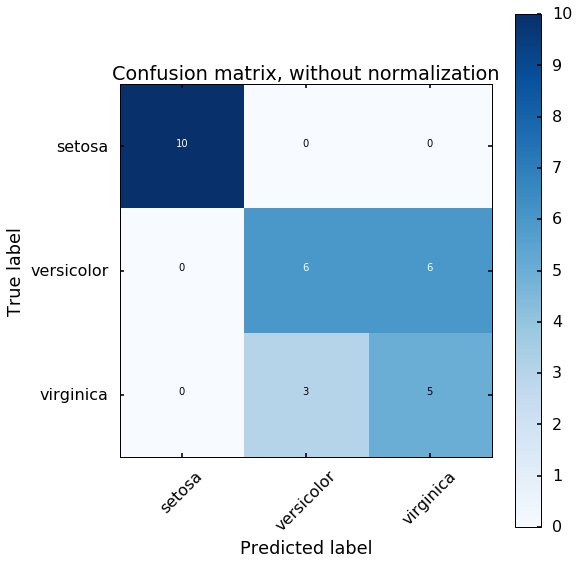

In [68]:
# predict results from the test data
predicted = clf.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

The x axis is the predicted digit from the MLP model, and the y axis is the true digit. The diagonal represents the correct results, we can see most of the digits we can estimate correctly. If we look at the first row, the off-diagonal number represents how many digits we estimate wrong for the digit 0, if there is 1 at the 6th column, this means that we classify one 0 digit to 5. 

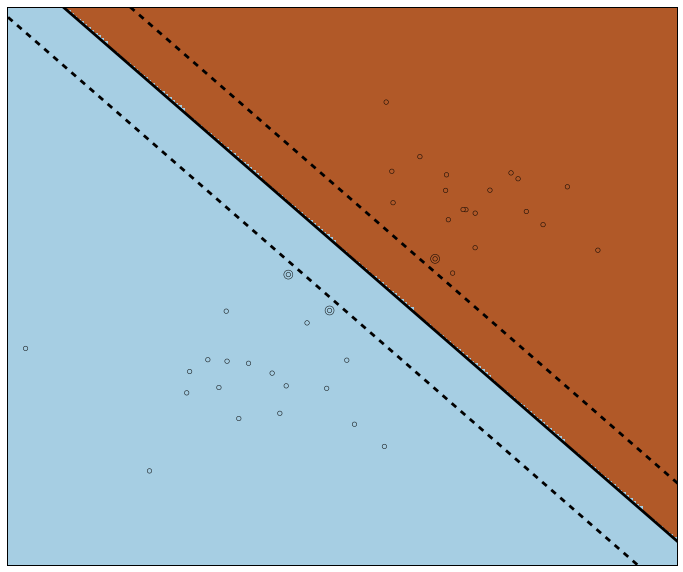

In [17]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(12, 10))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

I will explain the options usually you need change or know briefly here:  
* activation - this is to define different activation functions.   
* alpha - this parameter controls the [regularization][1] which help avoiding overfitting.  
* solver - the option to choose different algorithm for weight optimization. 
* batch_size - size of minibatches for stochastic optimizers. This is the option that will decide how much samples will be used in [online learning](https://en.wikipedia.org/wiki/Online_machine_learning).   
* learning_rate - option to use different learning rate for weight updates. You can use constant learning rate, or changing the learning rate with progress.   
* max_iter - maximum number of iterations. This will decide when to stop the solver, either the solver converges (determined by 'tol') or this maximum number of iterations.  
* tol - tolerance for the optimization.  
* momentum - momentum for gradient descent update. This will try to avoid trap the local minimum. 

[1]: https://en.wikipedia.org/wiki/Regularization_(mathematics)

## Visualize the test results  

Let's visualize the first 64 digits in the test data. The green or the red digits at the left bottom corner are our estimation from the MLP model. Green means we correctly classified the data, and red indicates the model did wrong. 

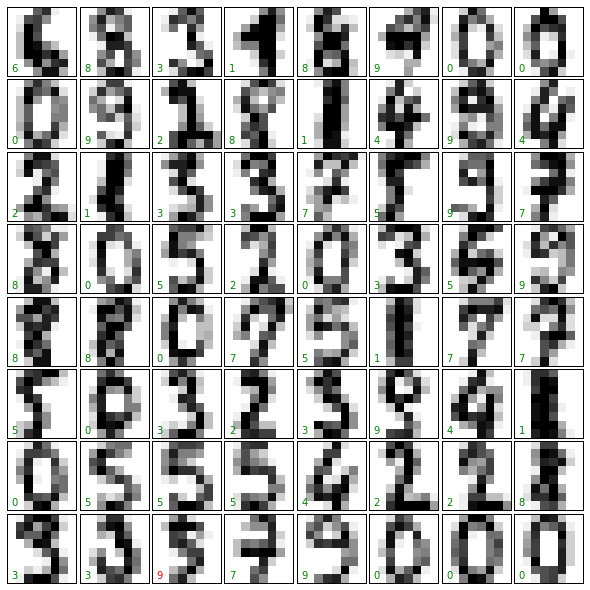

In [9]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')